In [1]:
import platform
import sys
import os
import tensorflow as tf
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from tensorflow.keras import datasets, layers, models
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from PIL import Image
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray



In [3]:
y=[]
x=[]
z=0
for f in os.listdir("/content/drive/MyDrive/ROB-Project/l_down_pil/"):
  z+=1
  #print(z)
  if z<=500:
    img_path="/content/drive/MyDrive/ROB-Project/down_train/"+f
    label_path="/content/drive/MyDrive/ROB-Project/l_down_pil/"+f
    label=np.asarray(Image.open(label_path))
    #print(label)
    w=label.shape[1]
    h=label.shape[0]
    tensor_curr=np.zeros((h,w,8))
    for i in range(h):
      for j in range(w):
        if label[i,j]<10:
          tensor_curr[i,j,label[i,j]]=1
        else:
          tensor_curr[i,j,7]=1
    y.append(tensor_curr)
    x.append(rgb2gray(mpimg.imread(img_path)))
x=np.stack(x)
x=np.expand_dims(x, axis=3)
y=np.stack(y)
y_train=y[0:400]
x_train=x[0:400]

In [4]:
y_train.shape

(400, 360, 640, 8)

In [5]:
import gc
gc.collect()

114

In [6]:
tf.keras.backend.clear_session()
model = models.Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:], padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.UpSampling2D(size=(2, 2)))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.UpSampling2D(size=(2, 2)))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=y_train.shape[-1], kernel_size=(3, 3), activation='softmax', padding='same'))

In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 360, 640, 16)      160       
                                                                 
 conv2d_1 (Conv2D)           (None, 360, 640, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 180, 320, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 320, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 320, 32)      9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 320, 32)      9248      
                                                        

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy(),
                       tf.keras.metrics.Recall(),
                       tf.keras.metrics.Precision(),
                      tf.keras.metrics.MeanIoU(y_train.shape[-1])])

In [9]:
x_valid=x[401:450]
y_valid=y[401:450]
history = model.fit(x_train, y_train, batch_size=8, epochs=100,
                    validation_data=(x_valid, y_valid))

Epoch 1/100
50/50 [==============================] - 22s 210ms/step - loss: 1.6132 - categorical_accuracy: 0.4319 - recall: 0.1649 - precision: 0.6472 - mean_io_u: 0.4375 - val_loss: 1.3866 - val_categorical_accuracy: 0.6001 - val_recall: 0.2948 - val_precision: 0.5515 - val_mean_io_u: 0.4375
Epoch 2/100
50/50 [==============================] - 9s 186ms/step - loss: 1.4285 - categorical_accuracy: 0.4667 - recall: 0.2634 - precision: 0.7152 - mean_io_u: 0.4375 - val_loss: 1.3819 - val_categorical_accuracy: 0.5653 - val_recall: 0.4275 - val_precision: 0.5805 - val_mean_io_u: 0.4375
Epoch 3/100
50/50 [==============================] - 9s 185ms/step - loss: 1.2468 - categorical_accuracy: 0.5470 - recall: 0.3731 - precision: 0.7016 - mean_io_u: 0.4375 - val_loss: 1.6076 - val_categorical_accuracy: 0.5174 - val_recall: 0.3774 - val_precision: 0.5341 - val_mean_io_u: 0.4375
Epoch 4/100
50/50 [==============================] - 9s 186ms/step - loss: 1.1169 - categorical_accuracy: 0.5797 - recal

In [31]:
demo_ind=np.random.randint(low=451,high=499)
demo_truth=y[demo_ind]
demo_input=x[demo_ind]
demo_pred=model.predict(x[demo_ind,None])
mask_truth=np.zeros((360,640))
mask_pred=np.zeros((360,640))
#print(demo_pred.shape)
for i in range(360):
  for j in range(640):
    mask_truth[i,j]=np.argmax(demo_truth[i,j])
    mask_pred[i,j]=np.argmax(demo_pred[0,i,j])

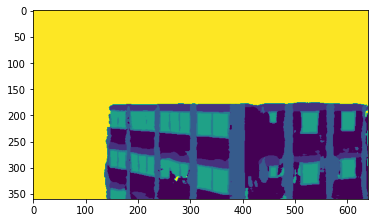

In [32]:
plt.imshow(mask_pred)

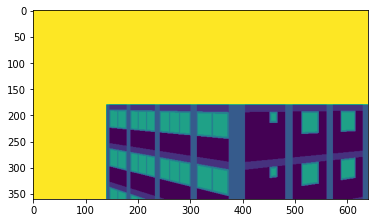

In [33]:
plt.imshow(mask_truth)

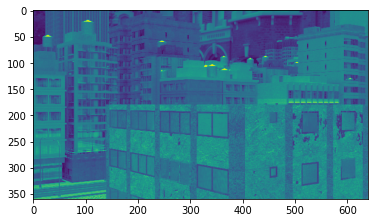

In [34]:
plt.imshow(demo_input[:,:,0])

In [14]:
model.save("/content/drive/MyDrive/ROB-Project/")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ROB-Project/assets


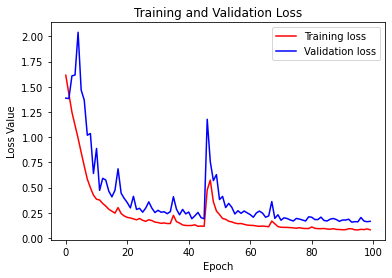

In [36]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(history.epoch, loss, 'r', label='Training loss')
plt.plot(history.epoch, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

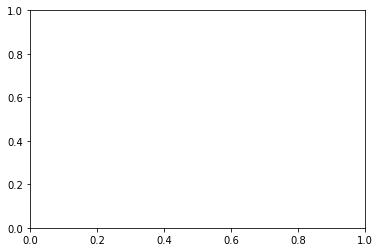

In [38]:
miou=history.history['mean_io_u']
val_miou=history.history['val_mean_io_u']

plt.cla()

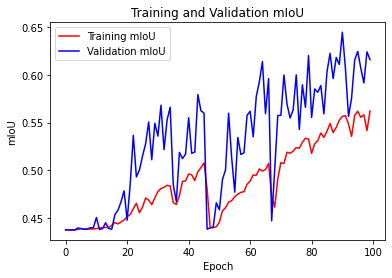

In [39]:
plt.plot(history.epoch, miou, 'r', label='Training mIoU')
plt.plot(history.epoch, val_miou, 'b', label='Validation mIoU')
plt.title('Training and Validation mIoU')
plt.xlabel('Epoch')
plt.ylabel('mIoU')
plt.legend()
plt.show()